In [3]:

import numpy as np


In [5]:


def softmax(z):
    exp_z = np.exp(z - np.max(z, axis=1, keepdims=True))  # numerical stability
    return exp_z / np.sum(exp_z, axis=1, keepdims=True)


In [6]:
def test_softmax():
    test_cases = [
        np.array([[0, 0, 0]]),
        np.array([[1, 2, 3]]),
        np.array([[1000, 1000, 1000]]),
        np.array([[-1000, -1000, -1000]]),
        np.array([[1, 0, -1]])
    ]

    for z in test_cases:
        result = softmax(z)
        assert np.allclose(result.sum(axis=1), 1)
        assert np.all(result >= 0)

    print(" Softmax tests passed")

test_softmax()


 Softmax tests passed


In [7]:
#2
def loss_softmax(y_true, y_pred):
    return -np.sum(y_true * np.log(y_pred + 1e-10))


In [8]:
def test_loss_softmax():
    y_true = np.array([0, 1, 0])
    y_pred = np.array([0.1, 0.8, 0.1])
    assert np.isclose(loss_softmax(y_true, y_pred), -np.log(0.8))

    y_true = np.array([1, 0, 0])
    y_pred = np.array([0.3, 0.4, 0.3])
    assert np.isclose(loss_softmax(y_true, y_pred), -np.log(0.3))

    print(" Loss tests passed")

test_loss_softmax()


 Loss tests passed


3. Cost Function (Average Loss)

In [9]:
def cost_softmax(X, y, W, b):
    n = X.shape[0]
    z = np.dot(X, W) + b
    y_pred = softmax(z)
    return -np.sum(y * np.log(y_pred + 1e-10)) / n


In [11]:
def test_cost_softmax():
    X = np.array([[1,2],[2,3],[3,4]])
    y = np.array([[1,0],[0,1],[1,0]])
    W = np.array([[1,-1],[-1,1]])
    b = np.array([0,0])

    z = np.dot(X,W) + b
    y_pred = softmax(z)
    expected = -np.sum(y * np.log(y_pred + 1e-10)) / X.shape[0]

    assert np.isclose(cost_softmax(X,y,W,b), expected)
    print(" Cost function tests passed")

test_cost_softmax()


 Cost function tests passed


4. Gradient Computation

In [12]:
def compute_gradient_softmax(X, y, W, b):
    n = X.shape[0]
    z = np.dot(X, W) + b
    y_pred = softmax(z)

    grad_W = np.dot(X.T, (y_pred - y)) / n
    grad_b = np.sum(y_pred - y, axis=0) / n

    return grad_W, grad_b


In [13]:
def test_compute_gradient_softmax():
    X = np.array([[1,2],[3,4]])
    y = np.array([[1,0],[0,1]])
    W = np.array([[0.1,0.2],[0.3,0.4]])
    b = np.array([0.01,0.02])

    z = np.dot(X,W) + b
    y_pred = softmax(z)

    grad_W_expected = np.dot(X.T, (y_pred - y)) / X.shape[0]
    grad_b_expected = np.sum(y_pred - y, axis=0) / X.shape[0]

    grad_W, grad_b = compute_gradient_softmax(X,y,W,b)

    assert np.allclose(grad_W, grad_W_expected)
    assert np.allclose(grad_b, grad_b_expected)

    print(" Gradient tests passed")

test_compute_gradient_softmax()


 Gradient tests passed


5. Gradient Descent

In [14]:
def gradient_descent_softmax(X, y, W, b, alpha, n_iter, show_cost=False):
    cost_history = []

    for i in range(n_iter):
        grad_W, grad_b = compute_gradient_softmax(X, y, W, b)
        W -= alpha * grad_W
        b -= alpha * grad_b

        cost = cost_softmax(X, y, W, b)
        cost_history.append(cost)

        if show_cost and (i % 100 == 0 or i == n_iter - 1):
            print(f"Iteration {i}: Cost = {cost:.6f}")

    return W, b, cost_history


6. Prediction Function

In [15]:
def predict_softmax(X, W, b):
    z = np.dot(X, W) + b
    y_pred = softmax(z)
    return np.argmax(y_pred, axis=1)


In [16]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
import matplotlib.pyplot as plt

iris = load_iris()
X = iris.data
y = iris.target

encoder = OneHotEncoder(sparse_output=False)
y_onehot = encoder.fit_transform(y.reshape(-1,1))

X_train, X_test, y_train, y_test = train_test_split(
    X, y_onehot, test_size=0.2, stratify=y, random_state=42
)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [18]:
#8
num_features = X_train.shape[1]
num_classes = y_train.shape[1]

W = np.zeros((num_features, num_classes))
b = np.zeros(num_classes)

W, b, cost_history = gradient_descent_softmax(
    X_train, y_train, W, b,
    alpha=0.1,
    n_iter=1000,
    show_cost=True
)


Iteration 0: Cost = 1.006823
Iteration 100: Cost = 0.319428
Iteration 200: Cost = 0.251376
Iteration 300: Cost = 0.211741
Iteration 400: Cost = 0.185004
Iteration 500: Cost = 0.165744
Iteration 600: Cost = 0.151226
Iteration 700: Cost = 0.139898
Iteration 800: Cost = 0.130812
Iteration 900: Cost = 0.123360
Iteration 999: Cost = 0.117192


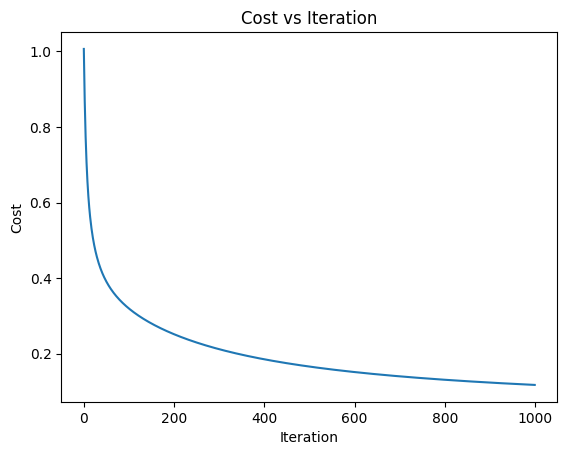

In [19]:
plt.plot(cost_history)
plt.xlabel("Iteration")
plt.ylabel("Cost")
plt.title("Cost vs Iteration")
plt.show()


In [20]:
#9
y_test_pred = predict_softmax(X_test, W, b)
y_test_true = np.argmax(y_test, axis=1)

accuracy = np.mean(y_test_pred == y_test_true) * 100
print(f"Test Accuracy: {accuracy:.2f}%")


Test Accuracy: 93.33%
